# TP 3 : SVM

## 0 - Introduction

L'objectif de ce premier TP est d'étudier le fonction des SVM.
Il sera à réaliser en python 3. Les librairies utilisées sont installées sur les machines de l'université et de l'Ensicaen, vous pouvez néanmoins les installer sur vos propres machines à l'aide de l'utilitaire pip présent par défaut avec python.
	
N'hésitez pas à regarder régulièrement la documentation de ces librairies, des exemples d'utilisation accompagnent généralement l'explication de chaque fonction.


Langage utilisé:
- Python 3: https://docs.python.org/3/

Librairie de math:
- Numpy: https://docs.scipy.org/doc/numpy/reference/
- Scipy: https://docs.scipy.org/doc/scipy/reference/

Librairie d'affichage de données:
- Matplotilb: https://matplotlib.org/contents.html

Librairie de traitement d'image:
- Scikit-image: https://scikit-image.org/

Librairie d'apprentissage automatique:
- Scikit-learn: http://scikit-learn.org

**Afin d'avoir un code optimisé, vous éviterez d'utiliser les instructions python3 `if`, `for` et `while` (sauf mention contraire dans le sujet).**

In [2]:
#Ce bloc contient tous les imports nécessaires pour ce TP.

# import de fonctions mathématiques
import numpy as np
import scipy as sc

# import fonction d'affichage
import matplotlib
import matplotlib.pyplot as plt


# import librairies d'apprentissage automatique
import sklearn as skl
import sklearn.datasets as data
import sklearn.model_selection
import sklearn.svm

#Gestion des fichiers csv
import csv

Afin de vous guider dans la détection d'erreur dans votre code. Nous avons introduit des blocs de tests. Il n'est pas nécessaire que vous compreniez en détail le code de ces blocs. Vous devez uniquement les exécuter et corriger les erreurs de votre code si un des tests n'est pas valide. Il est important de noter que le fait de valider le test ne garantit pas que votre code ne contient pas d'erreur. Par contre un test non validé implique nécessairement que votre code contient une erreur.

- Si tout les tests sont valides, vous aurez un message écrit en vert indiquant : Ok - Tous les tests sont validés.
- Si un des tests n'est pas valide, vous aurez un message écrit en rouge indiquant : Au moins un test n'est pas validé.
- Pour les tests non valides, vous aurez des éléments d'information sur le test non valide. En particulier, un message écrit en jaune vous détaillera la nature du test échoué.

Voici un exemple d'utilisation. Le bloc suivant est censé contenir l'affectation de la valeur 42 à la variable `a`. Le bloc de test d'après vérifie que vous avez correctement effectué l'affectation. Exécutez les deux blocs avec des valeurs de `a` correcte et incorrecte.
Vous devez supprimer la ligne `raise NotImplementedError()` qui indique que vous n'avez pas encore fait l'implémentation.

In [3]:
# YOUR CODE HERE
a=42
print(a)

42


In [4]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(a,42,err_msg="\033[93m {}\033[00m" .format('Test 1 : a n\'est pas égale à 42. Vérifiez que a==42'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


## 1 - Récupération des données d'apprentissage et de test


Nous  allons  travailler  sur  des  donnees  d’apprentissage  reparties  en  deux  classes  non  lineairement séparables. Ces données sont dans le fichier `data2D.csv` disponible sur le moodle du cours. Chaque ligne de ce fichier comporte trois valeurs : des coordonnées bidimensionnelles et la classe (0 ou 1). Pour charger les données nous procéderons ainsi :

In [4]:
def lireCSV(fichier):
    data = []
    with open(fichier, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        tmp =[]
        for row in spamreader:
            tmp.append(row)
        data.append(tmp)
    return np.array(data[0])

data = lireCSV('data2D.csv')

X = data[:,:2].astype(np.float32)
y = data[:,2].astype(np.int)

AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [7]:
def lireCSV(fichier):
    data = []
    with open(fichier, 'r') as csvfile:
        spamreader = csv.reader(csvfile, delimiter=',', quotechar='|')
        tmp =[]
        for row in spamreader:
            tmp.append(row)
        data.append(tmp)
    return np.array(data[0])

data = lireCSV('data2D.csv')

X = data[:,:2].astype(np.float32)
y = data[:,2].astype(np.int_)

Affichez les données en utilisant une couleur différente pour chaque classe.

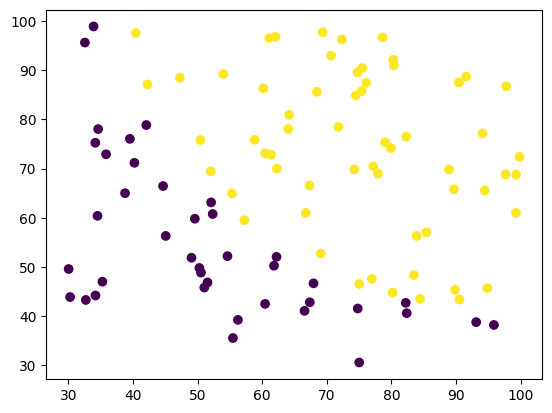

In [10]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

En utilisant la fonction `train_test_split` de `scikit-learn` ( https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html ) découpez les données en deux ensembles (train et val).
Vous utiliserez 40% des données pour test. Vous nommerez les données `X_train` et `X_test` et les labels `y_train` et `y_test`.

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
print("Taille de l'ensemble d'entraînement : ", len(X_train))
print("Taille de l'ensemble de validation : ", len(X_test))

Taille de l'ensemble d'entraînement :  60
Taille de l'ensemble de validation :  40


In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(X_train.shape[0]+X_test.shape[0],X.shape[0],err_msg="\033[93m {}\033[00m" .format('Test 1 : Certains exemples ne sont utilisé ni dans Train ni dans Test.'))
    np.testing.assert_equal(X_test.shape[0],X.shape[0]*.4,err_msg="\033[93m {}\033[00m" .format('Test 2 : La proportion des exemples utilisés pour Test n\'est pas correct.'))
    np.testing.assert_equal(X_test.shape[1],2,err_msg="\033[93m {}\033[00m" .format('Test 3 : Il manque des dimensions aux exemples de Test.'))
    np.testing.assert_equal(y_train.dtype,np.int,err_msg="\033[93m {}\033[00m" .format('Test 4 : Les labels d\'entrainement doivent être des entiers.'))
    np.testing.assert_equal(y_test.dtype,np.int,err_msg="\033[93m {}\033[00m" .format('Test 5 : Les labels de test doivent être des entiers.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

In [14]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(X_train.shape[0]+X_test.shape[0],X.shape[0],err_msg="\033[93m {}\033[00m" .format('Test 1 : Certains exemples ne sont utilisé ni dans Train ni dans Test.'))
    np.testing.assert_equal(X_test.shape[0],X.shape[0]*.4,err_msg="\033[93m {}\033[00m" .format('Test 2 : La proportion des exemples utilisés pour Test n\'est pas correct.'))
    np.testing.assert_equal(X_test.shape[1],2,err_msg="\033[93m {}\033[00m" .format('Test 3 : Il manque des dimensions aux exemples de Test.'))
    np.testing.assert_equal(y_train.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 4 : Les labels d\'entrainement doivent être des entiers.'))
    np.testing.assert_equal(y_test.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 5 : Les labels de test doivent être des entiers.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 
    

 Ok - Tous les tests sont validés.


Affichez sur une même figure les données d'apprentissage et de test. Vous utiliserez une couleur différente par classe et un marker différent pour train et test.

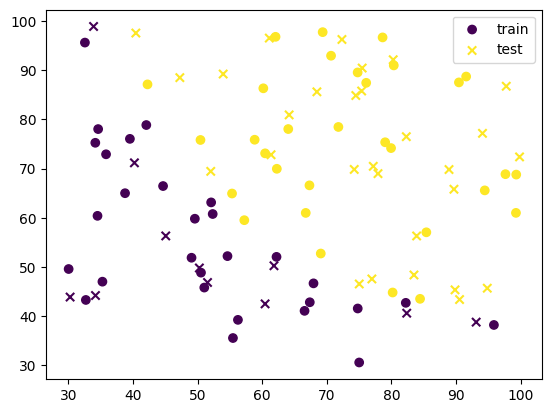

In [20]:
plt.scatter(X_train[:,0],X_train[:,1],c = y_train, marker='o', label = 'train' )
plt.scatter(X_test[:,0],X_test[:,1], c = y_test, marker='x', label = 'test')
plt.legend()
plt.show()

## 2 - SVM à l'aide de Scikit-learn 


Nous utiliseron dans cette partie les fonctions de la librairie `scikit-learn` pour l'utilisation des SVM. Les fonctions de la librairie exploitent eux même une autre librairie écrite en C appelé `libSVM`.

Nous étudierons dans cette partie les différents éléments important des SVM à savoir:
- le choix de la fonction noyau
- le choix des paramètres associé à ce noyau (degré pour un noyau polynomail, largueur de bande pour un noyau Gausien...)
- le choix des paramètres de régularisations.

Pour plus d'information sur l'utilisation des SVM dans `scikit-learn`, vous pouvez vous référer à la documentation : https://scikit-learn.org/stable/modules/svm.html

### 2.1 - SVM polynomial par défaut


En vous basant sur la documentation ( https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC ), apprenez un SVM à noyau polynomial sur les données d'apprentissage que vous nommerez `clf_poly`.

In [25]:
from sklearn import svm

# Créer un objet SVM avec un noyau polynomial de degré 3
clf_poly = svm.SVC(kernel='poly', degree=3)

clf_poly.fit(X_train, y_train)

SVC(kernel='poly')

In [26]:

# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(type(clf_poly),skl.svm._classes.SVC,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le type de clf_poly est incorrect.'))
    try:
        assert 'support_' in clf_poly.__dict__
    except Exception as e:
        raise AssertionError("\033[93m {}\033[00m" .format('Test 2 : Vous n\'avez pas appris clf_poly.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


En utilisant un code similaire au TP2, affichez avec deux couleurs différentes les zones associés à chaque classe retournée par le classifieur que vous venez d'apprendre.

In [27]:
# YOUR CODE HERE


En utilisant la fonction `classification_report` ( https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html ) de `scikit_learn`, affichez les performances du classifieurs sur la base de test.

In [28]:
from sklearn.metrics import classification_report

y_pred = clf_poly.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



### 2.2 Influence du degré du polynomial pour un SVM polynomial

Faites varier le degrée du polynôme utilisé pour la fonction noyau entre 1 et 30 (en prenant une valeur sur 3) et visualisez le changement dans la fonction apprise.

In [29]:
# YOUR CODE HERE
# Créer un objet SVM avec un noyau polynomial de degré 3
for i in range(1,11):
    clf_poly = svm.SVC(kernel='poly', degree=i*3)
    clf_poly.fit(X_train, y_train)

    y_pred = clf_poly.predict(X_test)
    print(i)
    print(classification_report(y_test, y_pred))

1
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

2
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        29

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

3
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        11
           1       1.00      0.97      0.98        29

    accuracy                           0.97        40
   macro avg       0.96      0.98      0.97        40
weighted avg       0.98      0.97      0.98        40

4
           

### 2.3 Influence du paramètre de régularisation sur un SVM polynomial

Apprenez des classifieurs polynomiaux de degré 2 avec un paramètre de régularisation variant de 0.001 à 100 pour chaque puissance de 10.

In [34]:
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Définir les paramètres de recherche
param_grid = {'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
              'svc__kernel': ['poly'],
              'svc__degree': [2],
              'svc__coef0': [0]}

# Créer un pipeline avec une étape de mise à l'échelle des données
# et une étape de classification SVM
pipe = Pipeline([('scaler', StandardScaler()),
                 ('svc', svm.SVC())])

# Créer un objet GridSearchCV pour effectuer la recherche de grille
# avec une validation croisée à 5 plis
grid_search = GridSearchCV(pipe, param_grid=param_grid, cv=5)

# Entraîner le GridSearchCV sur les données d'apprentissage
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print('Meilleurs paramètres :', grid_search.best_params_)

# YOUR CODE HERE
Cs = [0.001, 0.01, 0.1, 1, 10, 100]

Meilleurs paramètres : {'svc__C': 10, 'svc__coef0': 0, 'svc__degree': 2, 'svc__kernel': 'poly'}


### 2.4 SVM avec d'autres noyaux

Comparez les résultats de classification en changeant de noyau. Vous testerez notamment le noyau linéaire et le noyau gaussien.

In [35]:
from sklearn import svm
from sklearn.metrics import classification_report

# Entraîner un SVM avec noyau linéaire
clf_linear = svm.SVC(kernel='linear', C=1)
clf_linear.fit(X_train, y_train)

# Entraîner un SVM avec noyau gaussien
clf_rbf = svm.SVC(kernel='rbf', C=1, gamma='auto')
clf_rbf.fit(X_train, y_train)

# Faire des prédictions sur la base de test
y_pred_linear = clf_linear.predict(X_test)
y_pred_rbf = clf_rbf.predict(X_test)

# Afficher les performances du classifieur SVM avec noyau linéaire
print('Rapport de classification pour le SVM avec noyau linéaire :\n',
      classification_report(y_test, y_pred_linear))

# Afficher les performances du classifieur SVM avec noyau gaussien
print('Rapport de classification pour le SVM avec noyau gaussien :\n',
      classification_report(y_test, y_pred_rbf))

Rapport de classification pour le SVM avec noyau linéaire :
               precision    recall  f1-score   support

           0       0.89      0.73      0.80        11
           1       0.90      0.97      0.93        29

    accuracy                           0.90        40
   macro avg       0.90      0.85      0.87        40
weighted avg       0.90      0.90      0.90        40

Rapport de classification pour le SVM avec noyau gaussien :
               precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       0.85      1.00      0.92        29

    accuracy                           0.88        40
   macro avg       0.93      0.77      0.81        40
weighted avg       0.89      0.88      0.86        40



### 2.5 La validation croisée

Le nombre de paramètres à explorer est potentiellement important et il n'est pas toujours évident de connaiter les meilleurs combinaisons à utiliser pour un problème donné. `Scikit-learrn` met à disposition plusieurs solution pour explorer les paramètres possibles et calculer les performances finales. Vous retrouverez ces information à l'adresse: https://scikit-learn.org/stable/model_selection.html .
Nous allons dans cette partie, nous concentrer plus particulièrement sur la validation croisée: https://scikit-learn.org/stable/modules/cross_validation.html .
Commencez par lire en détail la documentation.

À l'aide de la classe `GridSearchCV` https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html , trouvez les meilleurs paramètres parmi les configurations suivantes pour une fonction de coût de type `accuracy`:
- Noyaux gaussiens avec gamma parmi [$10^{-1},10^{-2},10^{-3}$] et C parmi [$0.1,1,10,100$],
- Noyaux polynomial de degré 1, 2 ou 3; décalage 0.1,1 ou 10 ;  C parmi [$0.1,1,10,100$].

In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import numpy as np

X = data[:, :2].astype(np.float32)
y = data[:, 2].astype(np.int_)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

param_grid = [
    {'kernel': ['rbf'], 'gamma': [0.1, 0.01, 0.001], 'C': [0.1, 1, 10, 100]},
    {'kernel': ['poly'], 'degree': [1, 2, 3], 'coef0': [0.1, 1, 10], 'C': [0.1, 1, 10, 100]}
]

svc = SVC(kernel='linear')
grid_search = GridSearchCV(svc, param_grid, scoring='accuracy', cv=5)

grid_search.fit(X_train, y_train)

print("Meilleurs param:", grid_search.best_params_)
print("Meilleure précision de class:", grid_search.best_score_)

Meilleurs param: {'C': 0.1, 'coef0': 0.1, 'degree': 3, 'kernel': 'poly'}
Meilleure précision de class: 0.9833333333333332


 Calculez les performances de classification de la meilleur solution et  affichez la frontière de décision et les vecteurs de support de la meilleure combinaison de paramètre

Accuracy: 0.85


/tmp/ipykernel_10860/3672634494.py:33: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolors='black')


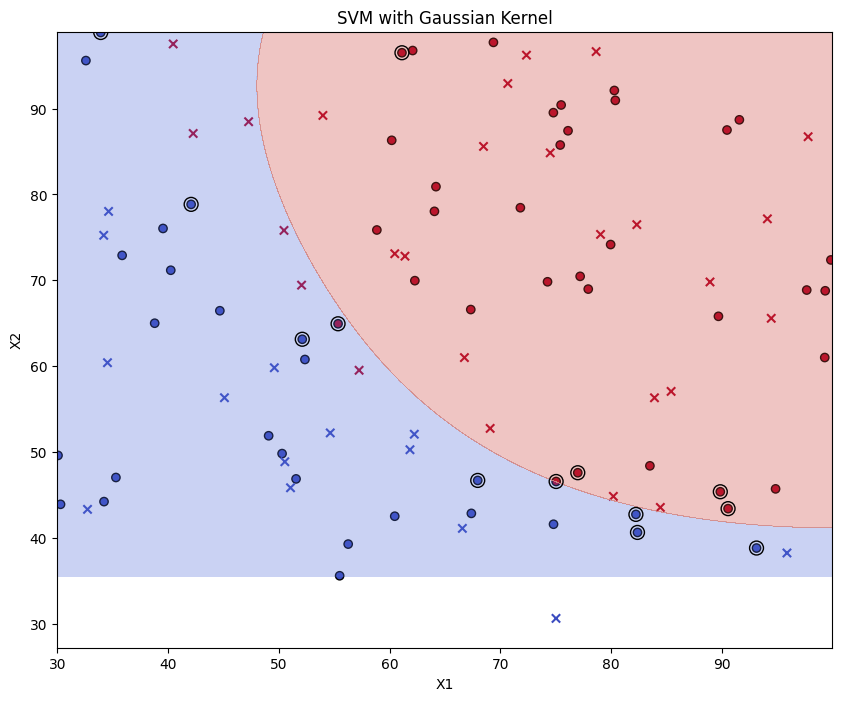

In [39]:
# YOUR CODE HERE
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Grille de paramètres pour le noyau gaussien
param_grid_gaussian = {'C': [0.1, 1, 10, 100], 'gamma': [0.1, 0.01, 0.001]}

# Grille de paramètres pour le noyau polynomial
param_grid_poly = {'C': [0.1, 1, 10, 100], 'degree': [1, 2, 3], 'coef0': [0.1, 1, 10]}

# Création des classifieurs avec les deux types de noyaux
svc_gaussian = SVC(kernel='rbf')
svc_poly = SVC(kernel='poly')

# Recherche des meilleurs paramètres avec la cross-validation
grid_search_gaussian = GridSearchCV(svc_gaussian, param_grid_gaussian, cv=5)
grid_search_gaussian.fit(X_train, y_train)

grid_search_poly = GridSearchCV(svc_poly, param_grid_poly, cv=5)
grid_search_poly.fit(X_train, y_train)

# Meilleur modèle
best_model = grid_search_gaussian.best_estimator_

# Performance sur l'ensemble de test
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

# Affichage de la frontière de décision et des vecteurs de support
plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='black')
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap='coolwarm', marker='x', edgecolors='black')

xmin, xmax = X_train[:, 0].min() - 0.1, X_train[:, 0].max() + 0.1
ymin, ymax = X_train[:, 1].min() - 0.1, X_train[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(xmin, xmax, 0.01), np.arange(ymin, ymax, 0.01))

Z = best_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(best_model.support_vectors_[:, 0], best_model.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')
plt.title('SVM with Gaussian Kernel')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()


## 3 - SVM à l'aide de l'algorithme SMO


Nous allons dans cette partie faire une implémentation simplifiée de l'algorithme SMO (Sequential minimal optimization) pour la résolution d'un SVM dans le dual. L'algorithème SMO est un algorithme itératif. À chaque itération deux multiplicateurs de lagrange $\alpha_i$ et $\alpha_j$ sont choisis et optimisés sur la fonction de coût du SVM. Les nouvelles valeurs $\alpha'_i$ et $\alpha'_j$ sont choisies de manière à satisfaire $y_1\alpha'_1+y_2\alpha'_2= y_1\alpha_1+y_2\alpha_2 = cst$ afin de respecter la contrainte $\sum_i \alpha_i y_i = 0$.

Nous nous appuierons dans cette partie sur la solution proposée dans le livre *Machine Learning in action* de Peter Harrigton, édition Manning.

Les labels précédement utilisés sont 0 ou 1. Définissez `y_train2` et `y_test2` correspondant aux labels ramenené au valeurs -1 et 1. Dans la suite de cette partie, nous utiliserons uniquement ces nouvelles variables.

In [44]:
# Ensemble de tous les labels entre -1 et 1:
y2 = y*2-1
y_train2 = y_train*2-1
y_test2 = y_test*2-1

In [41]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(len(y_train2),60,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le nombre de valeurs dans y_train2 est incorrect.'))
    np.testing.assert_equal(len(y_test2),40,err_msg="\033[93m {}\033[00m" .format('Test 2 : Le nombre de valeurs dans y_test2 est incorrect.'))
    np.testing.assert_equal(y_train2.dtype,np.int,err_msg="\033[93m {}\033[00m" .format('Test 3 : Le type des valeurs dans y_train2 est incorrect.'))
    np.testing.assert_equal(y_test2.dtype,np.int,err_msg="\033[93m {}\033[00m" .format('Test 4 : Le type des valeurs dans y_test2 est incorrect.'))
    np.testing.assert_equal(np.min(y_train2),-1,err_msg="\033[93m {}\033[00m" .format('Test 5 : Les valeurs minimal de y_train2 doivent être -1.'))
    np.testing.assert_equal(np.min(y_test2 ),-1,err_msg="\033[93m {}\033[00m" .format('Test 6 : Les valeurs minimal de y_test2 doivent être -1.'))
    np.testing.assert_equal(np.max(y_train2),1,err_msg="\033[93m {}\033[00m" .format('Test 7 : Les valeurs maximal de y_train2 doivent être 1.'))
    np.testing.assert_equal(np.max(y_test2 ),1,err_msg="\033[93m {}\033[00m" .format('Test 8 : Les valeurs maximal de y_test2 doivent être 1.'))
    np.testing.assert_equal(2*y_train-y_train2,np.ones(y_train2.shape),err_msg="\033[93m {}\033[00m" .format('Test 9 : Certaines valeurs de y_train2 sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 KO - Au moins un test n'est pas validé
Information sur le test non valide:
module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [45]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_equal(len(y_train2),60,err_msg="\033[93m {}\033[00m" .format('Test 1 : Le nombre de valeurs dans y_train2 est incorrect.'))
    np.testing.assert_equal(len(y_test2),40,err_msg="\033[93m {}\033[00m" .format('Test 2 : Le nombre de valeurs dans y_test2 est incorrect.'))
    np.testing.assert_equal(y_train2.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 3 : Le type des valeurs dans y_train2 est incorrect.'))
    np.testing.assert_equal(y_test2.dtype,np.int_,err_msg="\033[93m {}\033[00m" .format('Test 4 : Le type des valeurs dans y_test2 est incorrect.'))
    np.testing.assert_equal(np.min(y_train2),-1,err_msg="\033[93m {}\033[00m" .format('Test 5 : Les valeurs minimal de y_train2 doivent être -1.'))
    np.testing.assert_equal(np.min(y_test2 ),-1,err_msg="\033[93m {}\033[00m" .format('Test 6 : Les valeurs minimal de y_test2 doivent être -1.'))
    np.testing.assert_equal(np.max(y_train2),1,err_msg="\033[93m {}\033[00m" .format('Test 7 : Les valeurs maximal de y_train2 doivent être 1.'))
    np.testing.assert_equal(np.max(y_test2 ),1,err_msg="\033[93m {}\033[00m" .format('Test 8 : Les valeurs maximal de y_test2 doivent être 1.'))
    np.testing.assert_equal(2*y_train-y_train2,np.ones(y_train2.shape),err_msg="\033[93m {}\033[00m" .format('Test 9 : Certaines valeurs de y_train2 sont fausses.'))
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Écrivez une fonction qui tire un entier entre 0 et n (non compris) sauf le nombre j. Pour faire cela vous tirez un entier entre 0 et n-1 et y ajouter +1 si le nombre tiré est supérieur ou égale à j. Vous pouvez utiliser un `if` pour cette question.

In [73]:
import random
import numpy as np

def tirage_without(n, j):
    r = np.int64(random.randint(0, n - 2))
    if r >= j:
        r += 1
    return r

In [47]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    for i in range(1000):
        np.testing.assert_equal(type(tirage_without(10,4)),np.int,
                                err_msg="\033[93m {}\033[00m" .format('Test 1 : Les valeurs de tirage_without doivent être entière.')
                               )
        np.testing.assert_array_less(tirage_without(10,4),10,
                                err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de tirage_without doivent être entre 0 et n.')
                               )
        np.testing.assert_array_less(-1,tirage_without(10,4),
                                err_msg="\033[93m {}\033[00m" .format('Test 3 : Les valeurs de tirage_without doivent être entre 0 et n.')
                               )
        np.testing.assert_array_less(0.1,np.abs(tirage_without(10,4)-4),
                                err_msg="\033[93m {}\033[00m" .format('Test 4 : Les valeurs de tirage_without ne doivent pas contenir j.')
                               )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 KO - Au moins un test n'est pas validé
Information sur le test non valide:
module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


AttributeError: module 'numpy' has no attribute 'int'.
`np.int` was a deprecated alias for the builtin `int`. To avoid this error in existing code, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
The aliases was originally deprecated in NumPy 1.20; for more details and guidance see the original release note at:
    https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations

In [74]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    for i in range(1000):
        np.testing.assert_equal(type(tirage_without(10,4)),np.int_,
                                err_msg="\033[93m {}\033[00m" .format('Test 1 : Les valeurs de tirage_without doivent être entière.')
                               )
        np.testing.assert_array_less(tirage_without(10,4),10,
                                err_msg="\033[93m {}\033[00m" .format('Test 2 : Les valeurs de tirage_without doivent être entre 0 et n.')
                               )
        np.testing.assert_array_less(-1,tirage_without(10,4),
                                err_msg="\033[93m {}\033[00m" .format('Test 3 : Les valeurs de tirage_without doivent être entre 0 et n.')
                               )
        np.testing.assert_array_less(0.1,np.abs(tirage_without(10,4)-4),
                                err_msg="\033[93m {}\033[00m" .format('Test 4 : Les valeurs de tirage_without ne doivent pas contenir j.')
                               )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Définissez une fonction `f` qui évalue un classifieur SVM avec sa forme dual. Pour rappel: $f(x) = \sum_i \alpha_i y_i \langle x,x_i\rangle$+b.

In [75]:
def f(x,v_supports,y_supports,alphas,b):
    '''
    Calcul le résultat d'un classifieur SVM pour des exemples.
    :param x: exemple(s) que l'on souhaite évaluer. Chaque ligne correspond à un exemple. Dans le cas où il n'y a qu'un exemple, les dimensions sont (1,dimension du descripteur).
    :param v_supports: exemples de la base d'apprentissage ou vecteurs supports appris
    :param y_supports: labels des exemples d'apprentissage ou des vecteurs supports sélectionnés
    :param alphas: poids des vecteurs supports, les valeurs peuvent être nulle si toute la base d'apprentissage est donnée.
    :param b: paramètre de biais
    :return: le résultat de classification pour les exemples de x. f(x) = \sum alpha_i y_i <x_i,y> + b
    '''
    return np.dot(alphas * y_supports, np.dot(v_supports, x.T)) + b

In [76]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    svm = skl.svm.SVC(kernel='linear')
    svm.fit(X_train,y_train)
    np.testing.assert_almost_equal(f(X_test[None,12],svm.support_vectors_,y_train2[svm.support_],np.abs(svm.dual_coef_.squeeze()),svm.intercept_),
                            svm.decision_function(X_test[None,12]),
                            err_msg="\033[93m {}\033[00m" .format('Test 2 : Test de f sur l\'exemple 12 de test incorrect.')
                           )
    np.testing.assert_almost_equal(f(X_test,svm.support_vectors_,y_train2[svm.support_],np.abs(svm.dual_coef_.squeeze()),svm.intercept_),
                            svm.decision_function(X_test),
                            err_msg="\033[93m {}\033[00m" .format('Test 3 : Test de f sur tout les exemples de test incorrect.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 Ok - Tous les tests sont validés.


Soit `xi` un point de la base de données (le point d'indice `i`). Calculez l'écart entre l'évaluation de `f` pour `x` et le label attendu. Vous nommerez cette valeur `Ei`.

In [85]:
i = 0

xi = X[i]
v_supports = np.array([[99.8278578 , 72.36925193],
                       [62.0730638 , 96.76882412],
                       [50.53478829, 48.85581153],
                       [34.21206098, 44.2095286 ],
                       [75.39561147, 85.75993667]])
y_supports = np.array([1, 1, 0, 0, 1])
alphas = np.array([0.3, 0.2, 1, 0, 0.8])
b = 12

Ei = np.sum(alphas * y_supports * np.dot(v_supports, xi.T)) - y[i] - b 
print(Ei)


12100.301503716737


In [82]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(Ei,12125.3009706,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de Ei fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 KO - Au moins un test n'est pas validé
Information sur le test non valide:

Arrays are not almost equal to 7 decimals
 Test 1: valeur de Ei fausse.
 ACTUAL: 12100.301503716737
 DESIRED: 12125.3009706


AssertionError: 
Arrays are not almost equal to 7 decimals
[93m Test 1: valeur de Ei fausse.[00m
 ACTUAL: 12100.301503716737
 DESIRED: 12125.3009706

Faites de même avec le `xj`. Calculez l'erreur `Ej`.

In [83]:
j = 2
xj = X[j]


from sklearn.metrics.pairwise import linear_kernel

yi = y_train[i]
K = linear_kernel(xi.reshape(1,-1), v_supports)
Ei = f(xi,v_supports, y_supports, alphas, b) - yi
Ej = f(xj,v_supports, y_supports, alphas, b) - y_train[j]


In [70]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(Ej,11689.158114,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de Ej fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 KO - Au moins un test n'est pas validé
Information sur le test non valide:

Arrays are not almost equal to 7 decimals
 Test 1: valeur de Ej fausse.
 ACTUAL: 0.0
 DESIRED: 11689.158114


AssertionError: 
Arrays are not almost equal to 7 decimals
[93m Test 1: valeur de Ej fausse.[00m
 ACTUAL: 0.0
 DESIRED: 11689.158114

Calculez `eta` tel que $\eta = \|x_i-x_j\|^2 = -2\langle x_i,x_j \rangle + \|x_i\|^2 + \|x_j\|^2$.

In [71]:
xi = X[i]
xj = X[j]
eta = linear_kernel(xi.reshape(1, -1), xj.reshape(1, -1))[0, 0]


In [72]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(eta,27.737514826863844,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de eta fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

 KO - Au moins un test n'est pas validé
Information sur le test non valide:

Arrays are not almost equal to 7 decimals
 Test 1: valeur de eta fausse.
 ACTUAL: 6929.3403
 DESIRED: 27.737514826863844


AssertionError: 
Arrays are not almost equal to 7 decimals
[93m Test 1: valeur de eta fausse.[00m
 ACTUAL: 6929.3403
 DESIRED: 27.737514826863844

Calculez la nouvelle valeur de $\alpha_j$. Cette valeur correspond à un pas de descente de gradient : $\alpha_j : = \alpha_j + \dfrac{y_j (E_i-E_j)}{\eta}$. Vous placerez le résultat dans la variable `alpha_j_new`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(alpha_j_new,-14.7239341,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de alpha_j_new fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

En utilisant la fonction `np.clip` ( https://numpy.org/doc/stable/reference/generated/numpy.clip.html ) seuillez la nouvele valeur d'$\alpha_j$ pour avoir des valeurs entre $L$ et $H$. $\alpha_j := \left\{\begin{array}{ccc}
H &si&H<\alpha_j\\ 
\alpha_j &si&L\leq\alpha_j\leq H\\
L &si&\alpha_j<L\\
\end{array}
\right.$.

In [ ]:
L = 2
H = 10

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_array_less(L-1e-9,alpha_j_new,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur alpha_j_new doit être au moins de L.')
                           )
    np.testing.assert_array_less(alpha_j_new,H+1e-9,
                            err_msg="\033[93m {}\033[00m" .format('Test 2: valeur de alpha_j_new doit être au plus à H.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

Calculez la nouvelle version de $\alpha_i$ à l'aide de l'équation suivante: $\alpha_i := \alpha_i + y_i y_j (\alpha_j^\text{old}-\alpha_j)$. La valeur de $\alpha_i$ est choisi pour conserver l'égalité $\sum_i \alpha_i y_i = 0$. Vous placerez le résultat dans `alpha_i_new`.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(alpha_i_new,-0.7,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de alpha_i_new fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

Calculez la nouvelle valeur de $b$ (que vous mettrez dans `b_new`). En utilisant la formule suivante:
    $b := \left\{\begin{array}{ccc}
b_1 &si&0<\alpha_i<C\\ 
b_2 &si&0<\alpha_j<C\\
\dfrac{b_1+b_2}{2} &sinon&\\
\end{array}
\right.$, avec $b_1 = b - E_i -y_i (\alpha_i-\alpha_i^\text{old})\|x_i\|^2 - y_j (\alpha_j-\alpha_j^\text{old})\langle x_i,x_j\rangle$ 
et $b_2 = b - E_j -y_j (\alpha_j-\alpha_j^\text{old})\|x_j\|^2 - y_i (\alpha_i-\alpha_i^\text{old})\langle x_i,x_j\rangle$.

Vous pouvez utiliser un `if` pour cette question.

In [ ]:
C = 1
# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
# Ce bloc permet de valider votre code. Vous ne devez pas le modifier.  
try:
    np.testing.assert_almost_equal(b_new,-12238.6711933,
                            err_msg="\033[93m {}\033[00m" .format('Test 1: valeur de b_new fausse.')
                           )
except Exception as e: 
    print("\033[91m {}\033[00m" .format('KO - Au moins un test n\'est pas validé')) 
    print('Information sur le test non valide:')
    print(e)
    raise e
else:
    print("\033[92m {}\033[00m" .format('Ok - Tous les tests sont validés.')) 

En utilisant les questions précédentes, complétez le code suivant:

In [ ]:
def smoSimple(X,y,C,tol,maxIter):
    '''
    :param X: X données d'apprentissage. Chaque ligne correspond à un exemple.
    :param y: y labels des exemples d'apprentissage (-1 ou 1).
    :param C: paramètre de régularisation
    :param tol: tolérance sur le respect des contraintes
    :param maxIter: nombre maximale d'itération de l'algorithme.
    :return : retourne les poids des vecteurs suppérieurs (alphas) et le bias (b) du classifieur. Les poids sont à 0 pour les exemples d'apprentissages qui ne sont pas vecteur support.
    '''
    m,n = X.shape
    # Initialisation du classifieur
    b = 0
    alphas = np.zeros(X.shape[0])
    
    for t in range(maxIter):
        alphaPairsChanged = 0
        for i in range(m):
            # Évaluation de la fonction pour l'exemple i (fXi)
            ### BEGIN SOLUTION
            fXi = f(X[i,None,:],X,y,alphas,b)#np.sum(alphas * y * (X @ X[i,:])) + b
            
            # Erreur de l'exemple i (Ei)
            # YOUR CODE HERE
            raise NotImplementedError()
            
            # Si la contraintes n'est pas saturé et que |Ei|>tolerance
            if ((y[i]*Ei<-tol) and (alphas[i]<C)) or ((y[i]*Ei>tol)and (alphas[i]>0)):
                # Tirage aléatoire du deuxième points différent du premier et calcul de fXj et Ej.
                # YOUR CODE HERE
                raise NotImplementedError()
                
                alphaIold = alphas[i]
                alphaJold = alphas[j]
                
                if y[i] != y[j]:
                    L = max(0,alphas[j]-alphas[i])
                    H = min(C,C+alphas[j]-alphas[i])
                else:
                    L = max(0,alphas[j]+alphas[i] - C)
                    H = min(C,alphas[j]+alphas[i])
                if L == H :
                    continue         
                    
                # Calcul de Eta
                # YOUR CODE HERE
                raise NotImplementedError()
                
                if eta <= 0:
                    continue

                # Mise à jour de alpha_j. Changez directement alphas[j].
                # YOUR CODE HERE
                raise NotImplementedError()
                
                if np.abs(alphas[j]-alphaJold)<0.00001:
                    continue
                # Mise à jour de alpha_i. Changez directement alphas[i].
                # YOUR CODE HERE
                raise NotImplementedError()
                
                # Calcul de b
                # YOUR CODE HERE
                raise NotImplementedError()
                alphaPairsChanged += 1

    return alphas,b
                


In [ ]:
alphas,b = smoSimple(X_train,y_train*2-1,C=1e0,tol=1e-4,maxIter=1000)

Affichez dans une figure matplotlib les points d'apprentissage ainsi que les vecteurs supports sélectionnés.

In [ ]:
# YOUR CODE HERE
raise NotImplementedError()